In [35]:
import tensorflow as tf
import nltk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.text import Tokenizer 

def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(6, 6))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()
   
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.6.0


In [36]:
from datasets import load_dataset
emotion_dataset = load_dataset("emotion")

Using custom data configuration default
Reusing dataset emotion (C:\Users\valsa\.cache\huggingface\datasets\emotion\default\0.0.0\348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705)


  0%|          | 0/3 [00:00<?, ?it/s]

In [37]:
emotion_train = emotion_dataset['train']
print(emotion_train[0])
print(emotion_train.column_names)
print(emotion_train.features)

{'text': 'i didnt feel humiliated', 'label': 0}
['text', 'label']
{'text': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None, id=None)}


In [38]:
emotion_dataset.set_format(type="pandas")
df1 = emotion_dataset["train"][:]
test = emotion_dataset["test"][:]
val = emotion_dataset["validation"][:]

In [39]:
df1 = df1.rename(columns={'text':'sentence','label':'emotion'})
df1 = df1[["emotion", "sentence"]]
df1 = df1.replace([0,1,2,3,4,5],['sadness','joy','love','anger','fear','surprise'])
print(df1.emotion.unique())
print(len(df1))

['sadness' 'anger' 'love' 'surprise' 'fear' 'joy']
16000


In [6]:
test = test.rename(columns={'text':'sentence','label':'emotion'})
test = test[["emotion", "sentence"]]
test = test.replace([0,1,2,3,4,5],['sadness','joy','love','anger','fear','surprise'])
# test = test[test.emotion != 'surprise']
# test = test[test.emotion != 'love']
print(test.emotion.unique())
print(len(test))

['sadness' 'joy' 'fear' 'anger' 'love' 'surprise']
2000


In [7]:
val = val.rename(columns={'text':'sentence','label':'emotion'})
val = val[["emotion", "sentence"]]
val = val.replace([0,1,2,3,4,5],['sadness','joy','love','anger','fear','surprise'])
# val = val[val.emotion != 'surprise']
# val = val[val.emotion != 'love']
print(val.emotion.unique())
print(len(val))

['sadness' 'love' 'anger' 'joy' 'fear' 'surprise']
2000


In [33]:
df2 = pd.read_csv('G:\My Drive\AnjanaValsalan_ECNG 3020\Implementation Files\Datasets\ISEAR csv\ISEAR.csv')
df2.dropna(axis=1, how="any", thresh=None, subset=None, inplace=True)
df2 = df2[df2.emotion != 'disgust']
df2 = df2[df2.emotion != 'shame']
df2 = df2[df2.emotion != 'guilt']
print(df2.emotion.unique())
print(len(df2))

['joy' 'fear' 'anger' 'sadness' 'disgust' 'shame' 'guilt']
7516


In [ ]:
frames = [df1, df2]
df = pd.concat(frames)
df = df[df.emotion != 'surprise']
df = df[df.emotion != 'love']
df = df.reset_index(drop=True)
df.emotion.unique()
len(df)

In [8]:
df1.groupby(['emotion']).count()

,sentence
emotion,
anger,2159
fear,1937
joy,5362
love,1304
sadness,4666
surprise,572


In [ ]:
sad_df = df.loc[df['emotion'] == 'sadness']
sad_list = sad_df.values.tolist()
rand = np.random.RandomState(32).permutation(len(sad_list))
sad_array = np.array(sad_df)[rand]
sad = sad_array[0: 3000]
sad_list = sad.tolist()
sad_df = pd.DataFrame(sad_list, columns=['emotion','sentence'])

In [ ]:
ang_df = df.loc[df['emotion'] == 'anger']
ang_list = ang_df.values.tolist()
rand = np.random.RandomState(32).permutation(len(ang_list))
ang_array = np.array(ang_df)[rand]
ang = ang_array[0: 3000]
ang_list = ang.tolist()
ang_df = pd.DataFrame(ang_list, columns=['emotion','sentence'])

In [ ]:
fear_df = df.loc[df['emotion'] == 'fear']
fear_list = fear_df.values.tolist()
rand = np.random.RandomState(32).permutation(len(fear_list))
fear_array = np.array(fear_df)[rand]
fear = fear_array[0: 3000]
fear_list = fear.tolist()
fear_df = pd.DataFrame(fear_list, columns=['emotion','sentence'])

In [ ]:
joy_df = df.loc[df['emotion'] == 'joy']
joy_list = joy_df.values.tolist()
rand = np.random.RandomState(32).permutation(len(joy_list))
joy_array = np.array(joy_df)[rand]
joy = joy_array[0: 3000]
joy_list = joy.tolist()
joy_df = pd.DataFrame(joy_list, columns=['emotion','sentence'])

frames = [sad_df, ang_df, fear_df, joy_df]
df = pd.concat(frames)
from sklearn.utils import shuffle
df = shuffle(df)
df = df.reset_index(drop=True)

df.to_csv(r'G:\My Drive\AnjanaValsalan_ECNG 3020\Implementation Files\Datasets\ISEAR_and_HF.csv')

In [9]:
text_train = df1.drop(columns = ['emotion']).copy()
label_train = df1['emotion']
text_test = test.drop(columns = ['emotion']).copy()
label_test = test['emotion']
text_val = val.drop(columns = ['emotion']).copy()
label_val = val['emotion']

In [10]:
text_train_list=[ i[0] for i in text_train.values.tolist()]
label_train_list=[ i[0] for i in label_train.values.tolist()]
text_val_list=[ i[0] for i in text_val.values.tolist()]
label_val_list=[ i[0] for i in label_val.values.tolist()]
text_test_list=[ i[0] for i in text_test.values.tolist()]
label_test_list=[ i[0] for i in label_test.values.tolist()]

In [11]:
tokenizer = Tokenizer(num_words=1000000, oov_token='<UNK>')
tokenizer.fit_on_texts([text_train_list[1]])
tokenizer.texts_to_sequences([text_train_list[1]])

[[4, 5, 6, 2, 7, 3, 8, 9, 3, 10, 11, 12, 2, 13, 14, 15, 16, 17, 18, 19, 20]]

<function matplotlib.pyplot.show(close=None, block=None)>

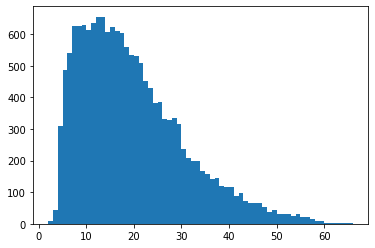

In [12]:
lengths = [len(t.split(' ')) for t in text_train_list]
plt.hist(lengths, bins = len(set(lengths)))
plt.show

In [13]:
max_length = 60
from tensorflow.keras.preprocessing.sequence import pad_sequences

def get_sequences(tokenizer, text_train_list):
    sequences = tokenizer.texts_to_sequences(text_train_list)
    padded = pad_sequences(sequences, truncating='post', padding='post', maxlen = max_length)
    return padded

padded_train_seq = get_sequences(tokenizer,text_train_list)

In [14]:
classes = set(label_train)
print(classes)

{'surprise', 'anger', 'sadness', 'love', 'fear', 'joy'}


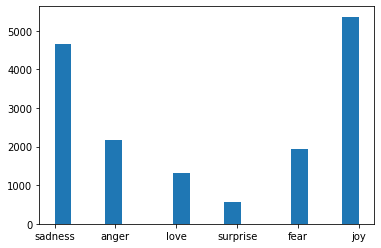

In [15]:
plt.hist(label_train, bins=18)
plt.show()

In [16]:
class_to_index = dict((c,i) for i, c in enumerate(classes))
index_to_class = dict((v, k) for k, v in class_to_index.items())

In [17]:
names_to_ids = lambda label_train: np.array([class_to_index.get(x) for x in label_train])

train_labels = names_to_ids(label_train)

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    #tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(6, activation='softmax')
    
])

In [19]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer = optimizer,
    metrics=['accuracy']
)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 60, 16)            160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 60, 40)            5920      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 40)                9760      
_________________________________________________________________
dense (Dense)                (None, 6)                 246       
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


In [21]:
text_val_seq = get_sequences(tokenizer, text_val_list)
label_val = names_to_ids(label_val)

In [22]:
h = model.fit(
padded_train_seq, train_labels,
validation_data=(text_val_seq, label_val),
epochs=20,
callbacks=[
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience = 2)
])

Epoch 1/20
500/500 [==============================] - 16s 17ms/step - loss: 1.5837 - accuracy: 0.3371 - val_loss: 1.5772 - val_accuracy: 0.3520
Epoch 2/20
500/500 [==============================] - 6s 12ms/step - loss: 1.5712 - accuracy: 0.3485 - val_loss: 1.5794 - val_accuracy: 0.3520
Epoch 3/20
500/500 [==============================] - 6s 12ms/step - loss: 1.5684 - accuracy: 0.3503 - val_loss: 1.5827 - val_accuracy: 0.3535
Epoch 4/20
500/500 [==============================] - 6s 13ms/step - loss: 1.5674 - accuracy: 0.3524 - val_loss: 1.5734 - val_accuracy: 0.3550
Epoch 5/20
500/500 [==============================] - 6s 13ms/step - loss: 1.5657 - accuracy: 0.3496 - val_loss: 1.5802 - val_accuracy: 0.3285
Epoch 6/20
500/500 [==============================] - 7s 13ms/step - loss: 1.5642 - accuracy: 0.3542 - val_loss: 1.5767 - val_accuracy: 0.3575
Epoch 7/20
500/500 [==============================] - 7s 13ms/step - loss: 1.5625 - accuracy: 0.3557 - val_loss: 1.5699 - val_accuracy: 0.355

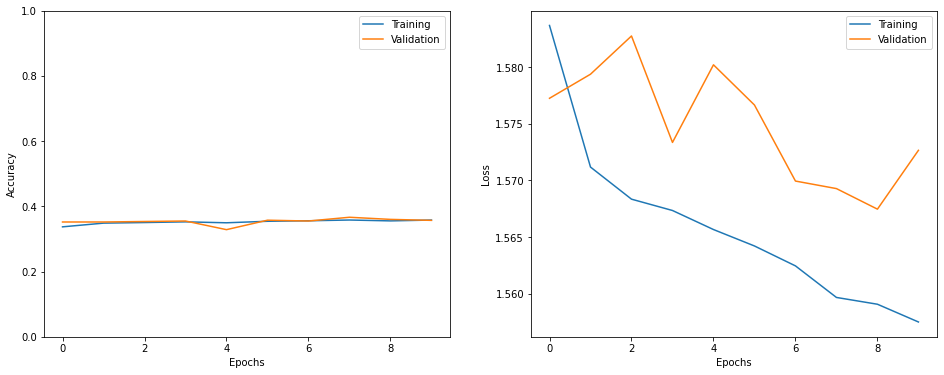

In [23]:
show_history(h)

In [24]:
test_seq = get_sequences(tokenizer, text_test_list)
test_labels = names_to_ids(label_test)

In [25]:
_= model.evaluate(test_seq, test_labels)

63/63 [==============================] - 0s 8ms/step - loss: 1.5476 - accuracy: 0.3550


In [26]:
i = random.randint(0, len(test_labels) - 1)

print('Sentence:', text_test_list[i])
print('Emotion:', index_to_class[test_labels[i]])

p = model.predict(np.expand_dims(test_seq[i], axis=0))[0]
pred_class = index_to_class[np.argmax(p).astype('uint8')]

print('Predicted Emotion:', pred_class)

Sentence: i dont know if i should let go and feel that vain or should i wait and stay in vain
Emotion: sadness
Predicted Emotion: joy


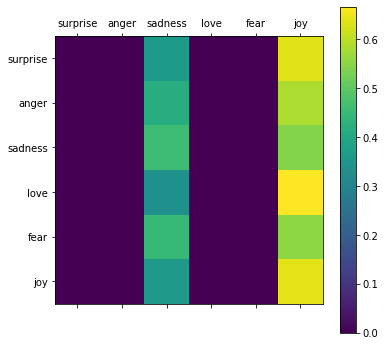

In [27]:
preds = np.argmax(model.predict(test_seq), axis=-1)
show_confusion_matrix(test_labels, preds, list(classes))